In [2]:
import pandas as pd

df = pd.read_csv("dynamic_pricing.csv")

# Head & Tail
print("🔹 First 5 rows:")
print(df.head())

print("\n🔹 Last 5 rows:")
print(df.tail())

# Info
print("\n🔹 Dataset Info:")
print(df.info())

# Shape
print("\nShape (rows, cols):", df.shape)

# This checks the start, end, data types, and structure.


🔹 First 5 rows:
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium          

In [3]:
print("\n🔹 Column Names:")
print(df.columns.tolist())

# Sanity: strip spaces, lowercase, replace bad chars
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("\n🔹 Cleaned Column Names:")
print(df.columns.tolist())


#Ensures column names are clean and consistent.


🔹 Column Names:
['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

🔹 Cleaned Column Names:
['number_of_riders', 'number_of_drivers', 'location_category', 'customer_loyalty_status', 'number_of_past_rides', 'average_ratings', 'time_of_booking', 'vehicle_type', 'expected_ride_duration', 'historical_cost_of_ride']


In [4]:
print("\n🔹 Missing Values Count:")
print(df.isnull().sum())

print("\n🔹 Percentage of Missing Values:")
print((df.isnull().mean() * 100).round(2))

# Tells us how many missing values per column.


🔹 Missing Values Count:
number_of_riders           0
number_of_drivers          0
location_category          0
customer_loyalty_status    0
number_of_past_rides       0
average_ratings            0
time_of_booking            0
vehicle_type               0
expected_ride_duration     0
historical_cost_of_ride    0
dtype: int64

🔹 Percentage of Missing Values:
number_of_riders           0.0
number_of_drivers          0.0
location_category          0.0
customer_loyalty_status    0.0
number_of_past_rides       0.0
average_ratings            0.0
time_of_booking            0.0
vehicle_type               0.0
expected_ride_duration     0.0
historical_cost_of_ride    0.0
dtype: float64


In [5]:
print("\n🔹 Number of duplicate rows:", df.duplicated().sum())
# Helps remove redundancy.


🔹 Number of duplicate rows: 0


In [6]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object","category"]).columns.tolist()

print("\n🔹 Numerical Columns:", num_cols)
print("\n🔹 Categorical Columns:", cat_cols)
# Shows mean, std, min, max, percentiles.


🔹 Numerical Columns: ['number_of_riders', 'number_of_drivers', 'number_of_past_rides', 'average_ratings', 'expected_ride_duration', 'historical_cost_of_ride']

🔹 Categorical Columns: ['location_category', 'customer_loyalty_status', 'time_of_booking', 'vehicle_type']


In [7]:
print("\n🔹 Numerical Columns Description:")
print(df[num_cols].describe().T)
# Useful for plotting distributions


🔹 Numerical Columns Description:
                          count        mean         std        min  \
number_of_riders         1000.0   60.372000   23.701506  20.000000   
number_of_drivers        1000.0   27.076000   19.068346   5.000000   
number_of_past_rides     1000.0   50.031000   29.313774   0.000000   
average_ratings          1000.0    4.257220    0.435781   3.500000   
expected_ride_duration   1000.0   99.588000   49.165450  10.000000   
historical_cost_of_ride  1000.0  372.502623  187.158756  25.993449   

                                25%         50%         75%         max  
number_of_riders          40.000000   60.000000   81.000000  100.000000  
number_of_drivers         11.000000   22.000000   38.000000   89.000000  
number_of_past_rides      25.000000   51.000000   75.000000  100.000000  
average_ratings            3.870000    4.270000    4.632500    5.000000  
expected_ride_duration    59.750000  102.000000  143.000000  180.000000  
historical_cost_of_ride  221.36

In [8]:
# Melt numerical columns into one column for visualization
num_long = df[num_cols].melt(var_name="feature", value_name="value")
print(num_long.head())


            feature  value
0  number_of_riders   90.0
1  number_of_riders   58.0
2  number_of_riders   42.0
3  number_of_riders   89.0
4  number_of_riders   78.0


In [9]:
import numpy as np

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

for col in num_cols:
    outliers, low, high = find_outliers_iqr(df, col)
    print(f"\n🔹 {col}: {len(outliers)} outliers (lower={low:.2f}, upper={high:.2f})")



🔹 number_of_riders: 0 outliers (lower=-21.50, upper=142.50)

🔹 number_of_drivers: 10 outliers (lower=-29.50, upper=78.50)

🔹 number_of_past_rides: 0 outliers (lower=-50.00, upper=150.00)

🔹 average_ratings: 0 outliers (lower=2.73, upper=5.78)

🔹 expected_ride_duration: 0 outliers (lower=-65.12, upper=267.88)

🔹 historical_cost_of_ride: 0 outliers (lower=-212.33, upper=944.20)


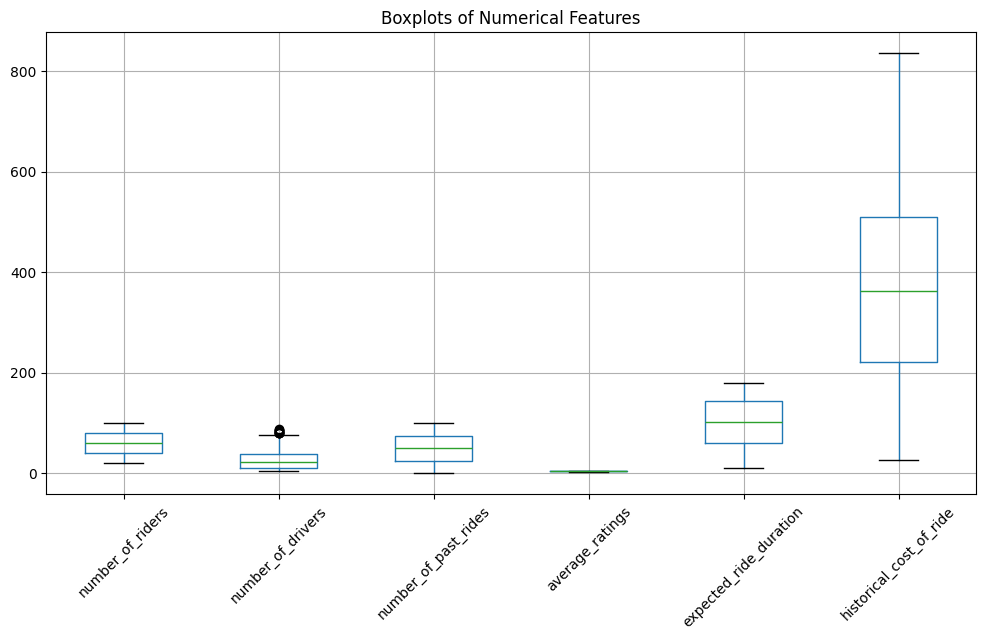

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of numerical features
plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()


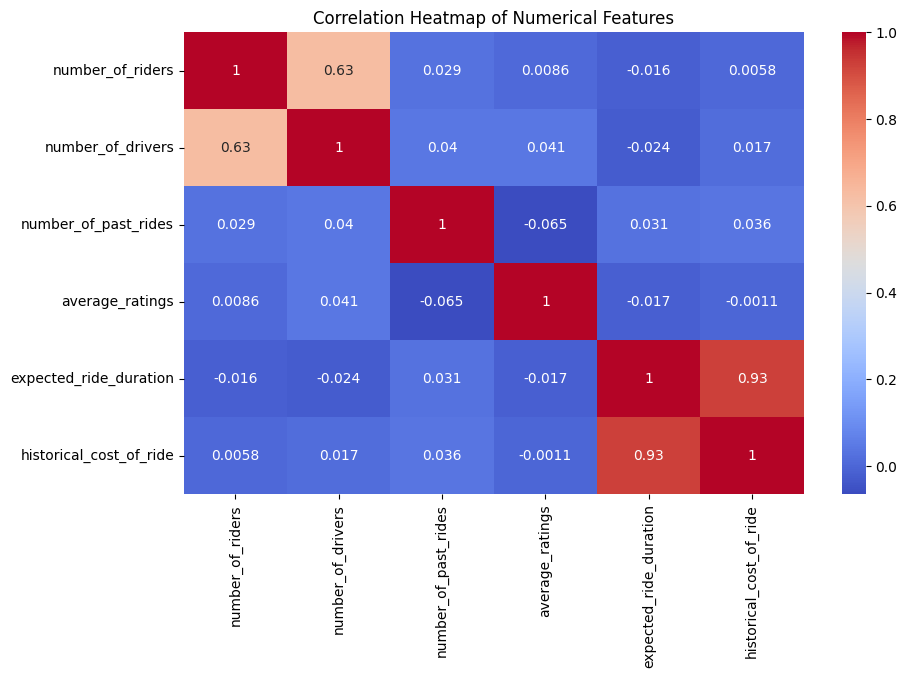

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [12]:
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(normalize=True))



location_category value counts:
location_category
Urban       0.346
Rural       0.332
Suburban    0.322
Name: proportion, dtype: float64

customer_loyalty_status value counts:
customer_loyalty_status
Silver     0.367
Regular    0.320
Gold       0.313
Name: proportion, dtype: float64

time_of_booking value counts:
time_of_booking
Night        0.276
Afternoon    0.247
Morning      0.246
Evening      0.231
Name: proportion, dtype: float64

vehicle_type value counts:
vehicle_type
Premium    0.522
Economy    0.478
Name: proportion, dtype: float64


In [13]:
from scipy.stats import skew

for col in num_cols:
    print(f"{col} skewness: {skew(df[col])}")


number_of_riders skewness: 0.0021632616645425417
number_of_drivers skewness: 0.9617588924264777
number_of_past_rides skewness: -0.008444267438104912
average_ratings skewness: -0.07863604521780783
expected_ride_duration skewness: -0.13965805969802533
historical_cost_of_ride skewness: 0.20926523813030767


In [16]:
# =============================
# KPI Calculations for Dynamic Pricing Dataset
# =============================

# Map dataset columns to our KPI terms
df['Price'] = df['Historical_Cost_of_Ride']
df['CompletedRides'] = df['Number_of_Riders']

# Assume cost per ride = 70% of price (example, since cost column not available)
# You can adjust this value if you have actual operating cost data
df['Cost_per_ride'] = df['Price'] * 0.7

# ---------- KPI 1: Revenue ----------
df['Revenue'] = df['Price'] * df['CompletedRides']

# ---------- KPI 2: Profit ----------
df['Profit'] = (df['Price'] - df['Cost_per_ride']) * df['CompletedRides']

# ---------- KPI 3: Revenue Lift (%) ----------
# Baseline Revenue = mean revenue across dataset
baseline_revenue = df['Revenue'].mean()
df['Revenue_Lift_%'] = ((df['Revenue'] - baseline_revenue) / baseline_revenue) * 100

# ---------- KPI 4: Gross Margin (%) ----------
df['Gross_Margin_%'] = (df['Profit'] / df['Revenue']) * 100

# ---------- KPI 5: Conversion Rate (%) ----------
# Since dataset doesn’t have booking intents, assume "Number_of_Riders" = completed rides
# For now, set booking intents = riders + 10% (example assumption)
df['BookingIntents'] = df['CompletedRides'] * 1.1
df['Conversion_Rate_%'] = (df['CompletedRides'] / df['BookingIntents']) * 100

# ---------- KPI 6: Price Change Rate (%) ----------
# Price volatility: percent difference from mean price
mean_price = df['Price'].mean()
df['Price_Change_%'] = (abs(df['Price'] - mean_price) / mean_price) * 100

# ---------- KPI 7: Cancellation Rate (%) ----------
# If no "CancelledRides" column exists, assume cancellation = 5% of riders (example assumption)
df['CancelledRides'] = df['CompletedRides'] * 0.05
df['Cancellation_Rate_%'] = (df['CancelledRides'] / (df['CompletedRides'] + df['CancelledRides'])) * 100

# =============================
# Final KPI Summary
# =============================
kpi_summary = {
    "Total Revenue (₹)": df['Revenue'].sum(),
    "Total Profit (₹)": df['Profit'].sum(),
    "Avg Revenue Lift (%)": df['Revenue_Lift_%'].mean(),
    "Avg Gross Margin (%)": df['Gross_Margin_%'].mean(),
    "Avg Conversion Rate (%)": df['Conversion_Rate_%'].mean(),
    "Avg Price Change Rate (%)": df['Price_Change_%'].mean(),
    "Avg Cancellation Rate (%)": df['Cancellation_Rate_%'].mean()
}

# Show KPI summary
print("\n=== KPI Summary ===")
for k, v in kpi_summary.items():
    print(f"{k}: {v:.2f}")

# Preview dataframe with KPIs
df.head()



=== KPI Summary ===
Total Revenue (₹): 22514545.02
Total Profit (₹): 6754363.51
Avg Revenue Lift (%): 0.00
Avg Gross Margin (%): 30.00
Avg Conversion Rate (%): 90.91
Avg Price Change Rate (%): 42.13
Avg Cancellation Rate (%): 4.76


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,Cost_per_ride,Revenue,Profit,Revenue_Lift_%,Gross_Margin_%,BookingIntents,Conversion_Rate_%,Price_Change_%,CancelledRides,Cancellation_Rate_%
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,...,198.980091,25583.154572,7674.946372,13.629454,30.0,99.0,90.909091,23.689860,4.50,4.761905
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,...,121.712327,10084.735659,3025.420698,-55.207908,30.0,63.8,90.909091,53.322543,2.90,4.761905
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,...,230.856828,13851.409696,4155.422909,-38.477950,30.0,46.2,90.909091,11.464927,2.10,4.761905
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,...,329.140862,41847.909626,12554.372888,85.870554,30.0,97.9,90.909091,26.227630,4.45,4.761905
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,...,405.776996,45215.150944,13564.545283,100.826403,30.0,85.8,90.909091,55.618078,3.90,4.761905
